In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # image dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data() # loading dataset

x_train = tf.keras.utils.normalize(x_train, axis=1) # normalizing the data acroos the axis

# All features of that sample are used to compute the norm (axis =1)
# All images together get normalized (feature-wise) across the axis 0 (axis=0)

x_test = tf.keras.utils.normalize(x_test, axis=1)



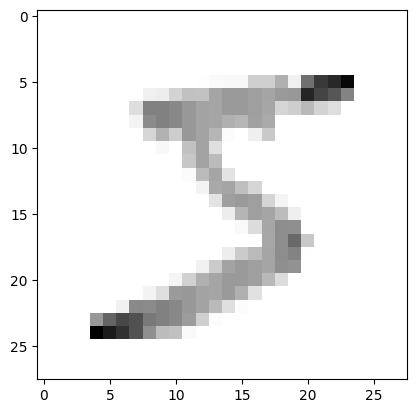

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary) # displaying the first image in the training set
plt.show()

In [10]:
# Building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # flattening the 28*28 image to a 784 array
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(10, activation="softmax")) # output layer with 10 neurons for 10 classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # compiling the model with adam optimizer and sparse categorical crossentropy loss function 
model.fit(x_train, y_train, epochs=3) # training the model for 3 epochs

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9240 - loss: 0.2524
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9672 - loss: 0.1051
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0736


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test) # evaluating the model on test data  
print(val_loss, val_acc)

# Overfitting is detected when training loss keeps decreasing but validation loss starts increasing.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.0964
0.0963754653930664 0.9717000126838684


In [12]:
model.save('mnist.keras') # saving the model

In [13]:
new_model = tf.keras.models.load_model('mnist.keras') # loading the saved model

In [14]:
predictions = new_model.predict(x_test) # making predictions on the test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


In [17]:
import numpy as np
print(predictions) # printing the predictions
print(np.argmax(predictions[6])) # printing the class with highest probability for the first test image

[[5.9543222e-08 6.7539290e-08 5.1650122e-06 ... 9.9998176e-01
  3.3498075e-08 6.9276368e-08]
 [3.0724256e-09 8.4828607e-05 9.9991333e-01 ... 1.0011444e-07
  6.7891513e-08 5.1574078e-10]
 [2.5092165e-08 9.9994981e-01 3.2643222e-06 ... 3.7739992e-05
  2.2885363e-06 2.8522397e-06]
 ...
 [6.6253330e-07 2.0518180e-05 2.2648961e-05 ... 1.8830544e-04
  1.3874148e-05 1.3390345e-04]
 [1.4676639e-05 6.3808761e-06 7.8874382e-07 ... 3.7672924e-06
  2.3605680e-02 7.0969027e-04]
 [1.5029876e-06 4.6245921e-07 5.4578641e-07 ... 9.4879915e-08
  6.9097155e-06 3.5265219e-07]]
4


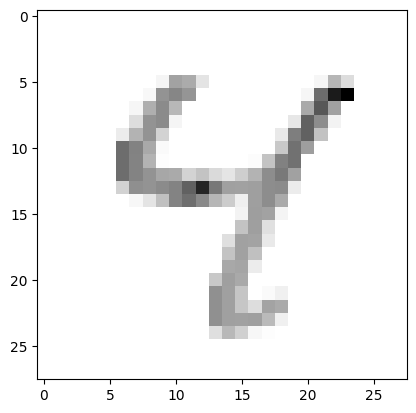

In [18]:
plt.imshow(x_test[6], cmap=plt.cm.binary) # displaying the first image in the test set
plt.show()